<a href="https://colab.research.google.com/github/suyogk23/ipl-prediction-models-STARC/blob/main/tensorFlow_ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [44]:
#reading dataset
ipl=pd.read_csv('iplData.csv')
ipl.head()

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [45]:
#dropping unwanted columns
ipl.drop(['Unnamed: 0','extras','match_id', 'runs_off_bat','wicket_type', 'player_dismissed'],axis = 1,inplace=True)
ipl.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,run,wickets,truns,y
0,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,1.0,0.0,1.0,68.0
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,1.0,68.0
2,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,1.0,0.0,2.0,68.0
3,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,2.0,68.0
4,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,2.0,68.0


In [46]:
df1=pd.read_csv('iplPlayerStats.csv')
df1.head()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


In [47]:
new_ipl = pd.merge(ipl,df1,left_on='striker',right_on='Player',how='left')

In [48]:
new_ipl.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,run,wickets,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,1.0,0.0
2,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,0.0,0.0
3,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,8.0,0.0
4,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,1.0,0.0,...,-,-,-,-,-,-,-,-,1.0,0.0


In [49]:
new_ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85191 entries, 0 to 85190
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   venue                 85191 non-null  object 
 1   innings               85191 non-null  int64  
 2   ball                  85191 non-null  float64
 3   batting_team          85191 non-null  object 
 4   bowling_team          85191 non-null  object 
 5   striker               85191 non-null  object 
 6   non_striker           85191 non-null  object 
 7   bowler                85191 non-null  object 
 8   run                   85191 non-null  float64
 9   wickets               85191 non-null  float64
 10  truns                 85191 non-null  float64
 11  y                     85191 non-null  float64
 12  Team                  75408 non-null  object 
 13  Player                75408 non-null  object 
 14  Tournament            75408 non-null  object 
 15  Matches            

In [50]:
#handling null values: nan replaced with'.'
str_cols = new_ipl.columns[new_ipl.dtypes==object]
new_ipl[str_cols] = new_ipl[str_cols].fillna('.')

In [51]:
#obtaining cols with dtype=object
object_columns = new_ipl.select_dtypes(include=['object']).columns.tolist()
objectCols=[]
objectCols.extend(object_columns)

In [52]:
print(objectCols)
print(len(objectCols))

['venue', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler', 'Team', 'Player', 'Tournament', 'Batting Innings', 'Not Out', 'Runds Scored', 'Highest Score', 'Batting Average', 'Balls Faced', 'Batting Strike Rate', '100', '50', '0', '4s', '6s', 'Bowling Innings', 'Overs Bowled', 'Maidens Bowled', 'Runs Conceded', 'Wickets Taken', 'Best Bowling Figures', 'Bowling Average', 'Bowling Economy Rate', 'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets']
32


In [53]:
#encoding object dtype columns into numerical values using LabelEncoder
#mapping features to their respective numbers
from sklearn.preprocessing import LabelEncoder

# Label encode the object-type columns
label_encoders = {}
for column in objectCols:
    label_encoder = LabelEncoder()
    new_ipl[column] = label_encoder.fit_transform(new_ipl[column])
    label_encoders[column] = label_encoder

#the encoded dataframe
new_ipl.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,run,wickets,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,15,1,0.1,7,13,186,30,201,1.0,0.0,...,1,1,1,1,1,1,1,1,NaN,NaN
1,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0
2,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,8.0,0.0
4,15,1,0.3,7,13,30,184,201,1.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0


In [54]:
# Print the mapping for label encoding
for column, encoder in label_encoders.items():
    mapping = {label: encoded_label for label, encoded_label in zip(encoder.classes_, encoder.transform(encoder.classes_))}
    print(f"Mapping for '{column}': {mapping}")

Mapping for 'venue': {'Arun Jaitley Stadium': 0, 'Barabati Stadium': 1, 'Brabourne Stadium': 2, 'Buffalo Park': 3, 'De Beers Diamond Oval': 4, 'Dr DY Patil Sports Academy': 5, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 6, 'Dubai International Cricket Stadium': 7, 'Eden Gardens': 8, 'Feroz Shah Kotla': 9, 'Green Park': 10, 'Himachal Pradesh Cricket Association Stadium': 11, 'Holkar Cricket Stadium': 12, 'JSCA International Stadium Complex': 13, 'Kingsmead': 14, 'M Chinnaswamy Stadium': 15, 'M.Chinnaswamy Stadium': 16, 'MA Chidambaram Stadium': 17, 'MA Chidambaram Stadium, Chepauk': 18, 'Maharashtra Cricket Association Stadium': 19, 'Nehru Stadium': 20, 'New Wanderers Stadium': 21, 'Newlands': 22, 'OUTsurance Oval': 23, 'Punjab Cricket Association IS Bindra Stadium': 24, 'Punjab Cricket Association IS Bindra Stadium, Mohali': 25, 'Punjab Cricket Association Stadium, Mohali': 26, 'Rajiv Gandhi International Stadium': 27, 'Rajiv Gandhi International Stadium, Uppal': 28, 'Sardar

In [55]:
ip_dataset = new_ipl[['venue','innings', 'batting_team',
					'bowling_team', 'striker', 'non_striker',
					'bowler']]

b1 = ip_dataset['venue'].unique()
b2 = ip_dataset['batting_team'].unique()
b3 = ip_dataset['bowling_team'].unique()
b4 = ip_dataset['striker'].unique()
b5 = ip_dataset['bowler'].unique()
new_ipl.fillna(0,inplace=True)

features={}

for i in range(len(a1)):
	features[a1[i]]=b1[i]
for i in range(len(a2)):
	features[a2[i]]=b2[i]
for i in range(len(a3)):
	features[a3[i]]=b3[i]
for i in range(len(a4)):
	features[a4[i]]=b4[i]
for i in range(len(a5)):
	features[a5[i]]=b5[i]

features


{'M Chinnaswamy Stadium': 15,
 'Punjab Cricket Association Stadium, Mohali': 26,
 'Feroz Shah Kotla': 9,
 'Eden Gardens': 8,
 'Wankhede Stadium': 39,
 'Sawai Mansingh Stadium': 31,
 'Rajiv Gandhi International Stadium, Uppal': 28,
 'MA Chidambaram Stadium, Chepauk': 18,
 'Dr DY Patil Sports Academy': 5,
 'Newlands': 22,
 "St George's Park": 35,
 'Kingsmead': 14,
 'SuperSport Park': 37,
 'Buffalo Park': 3,
 'New Wanderers Stadium': 21,
 'De Beers Diamond Oval': 4,
 'OUTsurance Oval': 23,
 'Brabourne Stadium': 2,
 'Sardar Patel Stadium, Motera': 29,
 'Barabati Stadium': 1,
 'Vidarbha Cricket Association Stadium, Jamtha': 38,
 'Himachal Pradesh Cricket Association Stadium': 11,
 'Nehru Stadium': 20,
 'Holkar Cricket Stadium': 12,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 6,
 'Subrata Roy Sahara Stadium': 36,
 'Shaheed Veer Narayan Singh International Stadium': 32,
 'JSCA International Stadium Complex': 13,
 'Sheikh Zayed Stadium': 34,
 'Sharjah Cricket Stadium': 33,
 'Dubai 

FEATURE SELECTION

In [57]:
#too many features-selected only some features as i/p from the user
X = new_ipl[['venue', 'innings','batting_team',
             'bowling_team', 'striker','bowler']].values
y = new_ipl['y'].values

In [58]:
#splitting dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42) #70%-30% split


In [59]:
#scaling with MinMaxScaler for easier comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

BUILDING THE DEEP LEARNING MODEL

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#multiple layers used- 2 hidden layers o/p-1
#early stopper prevents overfitting, related to loss function in DL
#each epoch is a training iteration

In [65]:
early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min',)

In [66]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [67]:
model.fit(x=X_train, y=y_train, epochs=400,
		validation_data=(X_test,y_test),
		callbacks=[early_stop] )


Epoch 1/400
1864/1864 [==============================] - 6s 3ms/step - loss: 825.3727 - val_loss: 235.1221
Epoch 2/400
1864/1864 [==============================] - 5s 3ms/step - loss: 530.2045 - val_loss: 209.1484
Epoch 3/400
1864/1864 [==============================] - 4s 2ms/step - loss: 463.4940 - val_loss: 190.2778
Epoch 4/400
1864/1864 [==============================] - 5s 3ms/step - loss: 424.6843 - val_loss: 172.8663
Epoch 5/400
1864/1864 [==============================] - 5s 3ms/step - loss: 394.9235 - val_loss: 174.0022
Epoch 6/400
1864/1864 [==============================] - 4s 2ms/step - loss: 369.6785 - val_loss: 186.0509
Epoch 7/400
1864/1864 [==============================] - 5s 3ms/step - loss: 351.7796 - val_loss: 171.5291
Epoch 8/400
1864/1864 [==============================] - 5s 3ms/step - loss: 331.4819 - val_loss: 165.5694
Epoch 9/400
1864/1864 [==============================] - 6s 3ms/step - loss: 317.6149 - val_loss: 164.3823
Epoch 10/400
1864/1864 [=============

<Axes: >

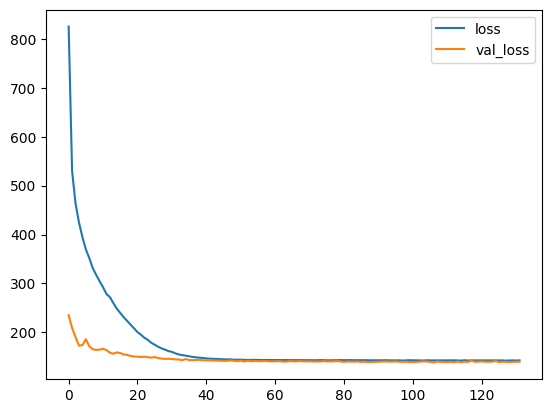

In [68]:
#we see the loss reducing in each step
#VISUALISING LOSS
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [69]:
#predicting values
predictions = model.predict(X_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)


799/799 [==============================] - 1s 1ms/step


,Predict,Actual
0,51.664112,47.0
1,52.600368,53.0
2,52.008896,56.0
3,51.566162,52.0
4,49.431347,20.0
5,52.616234,47.0
6,49.431347,26.0
7,51.945164,43.0
8,52.310646,55.0
9,49.431347,48.0


Performance Metrics

In [70]:
#mean absolute error
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

9.29355534172103

In [71]:
#rmse
np.sqrt(mean_squared_error(y_test,predictions))

11.837692583658374